In [1]:
import HARK.ConsumptionSaving.ConsPortfolioModel as cpm
from HARK.Calibration.Income.IncomeTools import (
     sabelhaus_song_var_profile,
)
from sharkfin.expectations import *
from sharkfin.population import *
from sharkfin.markets import *
from sharkfin.simulation import *
import logging
import math
from math import exp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
def run_simulation(agent_parameters, dist_params, n_per_class, a=None, q=None, r=1, fm=None, market=None, dphm=1500):
    #initialize population
    pop = AgentPopulation(agent_parameters, dist_params, n_per_class)
    
    market = MockMarket()
    
    #initialize the financial Fodel
    Fm = FinanceModel
    
    #initialize population model
    pop.init_simulation()
    
    attsim = AttentionSimulation(pop, Fm, a=a, q=q, r=r, market=market, dphm=dphm)
    attsim.simulate()
    
    return attsim, attsim.sim_stats()

In [3]:
dist_params = {
    'CRRA' : {'bot' : 2, 'top' : 10, 'n' : 2}, # Chosen for "interesting" results
    'DiscFac' : {'bot' : 0.936, 'top' : 0.978, 'n' : 2} # from CSTW "MPC" results
}

ssvp = sabelhaus_song_var_profile()

#assume all agents are 27
idx_40 = ssvp['Age'].index(40)

#parameters shared by all agents
agent_parameters = {
    'aNrmInitStd' : 0.0,
    'LivPrb' : [0.98 ** 0.25],
    'PermGroFac': [1.01 ** 0.25],
    'pLvlInitMean' : 1.0, # initial distribution of permanent income
    'pLvlInitStd' : 0.0,
    'Rfree' : 1.0,
    'TranShkStd' : [ssvp['TranShkStd'][idx_40] / 2],  # Adjust non-multiplicative shock to quarterly
    'PermShkStd' : [ssvp['PermShkStd'][idx_40] ** 0.25]
}

In [4]:
sim, sim_stats = run_simulation(agent_parameters, dist_params, 10, a=0.2, q=8, r=6, dphm=10500)

/home/sb/.local/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/sb/.local/lib/python3.9/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/sb/.local/lib/python3.9/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Q-0
attention, with delta: [0. 0.]
attention, with delta: [0. 0.]
attention, with delta: [0. 0.]
attention, with delta: [0. 0.]
attention, with delta: [0. 0.]
attention, with delta: [0. 0.]
run_market, buy_sell: (0, 0)
price: 98.38805489288931
ror: -0.016119451071106853
attention, with delta: [0.37803008 0.37803008]
attention, with delta: [0.37525812 0.37525812]
attention, with delta: [0.37525812 0.37525812]
run_market, buy_sell: (2, 164)
price: 84.04722181046893
ror: -0.011220133518076856
attention, with delta: [163.89712716 207.0436334 ]
attention, with delta: [0.59689557 0.59689557]
attention, with delta: [0.17731662 0.17731662]
attention, with delta: [0.17731662 0.17731662]
attention, with delta: [172.70458733 264.3603324 ]
run_market, buy_sell: (809, 43)
price: 75.55402983721005
ror: -0.004966417877927924
attention, with delta: [0.03359878 0.03359878]
attention, with delta: [213.50198301 838.33539631]
attention, with delta: [0.66569475 0.66569475]
run_market, buy_sell: (1053, 59)


attention, with delta: [-16.52850989  -3.66860228]
attention, with delta: [190.25099077  40.16189505]
attention, with delta: [ 39.09098503 389.80304543]
attention, with delta: [-1.46890977 -1.38104527]
run_market, buy_sell: (674, 1164)
price: 170.11180264672603
ror: -0.006542964254711223
attention, with delta: [127.18982562   8.23078881]
attention, with delta: [398.7237487   71.28926424]
attention, with delta: [ 63.22238404 158.75134339]
attention, with delta: [8.60578845 2.18149746]
attention, with delta: [ 2.33162301 10.87371321]
run_market, buy_sell: (851, 859)
price: 160.19958916378826
ror: -0.0009547878285279652
attention, with delta: [87.9180918  24.18195715]
attention, with delta: [2.07987273 0.43284329]
run_market, buy_sell: (114, 750)
price: 160.9191677611398
ror: 0.013164803478206439
attention, with delta: [117.35758733   9.87068327]
attention, with delta: [28.13582903 47.13101415]
attention, with delta: [43.99959955 16.03506077]
run_market, buy_sell: (262, 681)
price: 182.72

In [5]:
data = sim.data()

In [6]:
data

,t,prices,buy,sell,buy_macro,sell_macro,owned,total_assets,mean_income,total_consumption,permshock_std,ror,expected_ror,expected_std
0,0,98.388055,0,0,0,0,5236.827955,515045.341521,27936.079207,39162.297873,0.253874,-0.016119,-0.000003,0.012169
1,1,96.802093,0,0,0,0,5175.798901,504095.182675,27630.872179,104833.415465,0.344131,-0.016119,-0.000609,0.012283
2,2,95.241697,0,0,0,0,5175.798901,496149.069129,27630.872179,0.000000,0.344131,-0.016119,-0.001193,0.012341
3,3,93.706453,0,0,0,0,5175.798901,488331.042571,27630.872179,0.000000,0.344131,-0.016119,-0.001755,0.012354
4,4,92.195956,0,0,0,0,5132.542085,476623.113604,27156.843356,42202.976192,0.313065,-0.016119,-0.002296,0.012328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,475,371.226006,0,0,0,0,4010.780620,839763.948604,29765.508984,0.000000,0.670206,0.010450,0.002557,0.009287
476,476,375.105265,0,0,0,0,4010.780620,855485.390343,29765.508984,0.000000,0.670206,0.010450,0.003140,0.009173
477,477,379.025061,0,0,0,0,4010.780620,871371.118883,29765.508984,0.000000,0.670206,0.010450,0.003680,0.009032
478,478,382.985818,0,0,0,0,4010.780620,887422.850998,29765.508984,0.000000,0.670206,0.010450,0.004180,0.008871


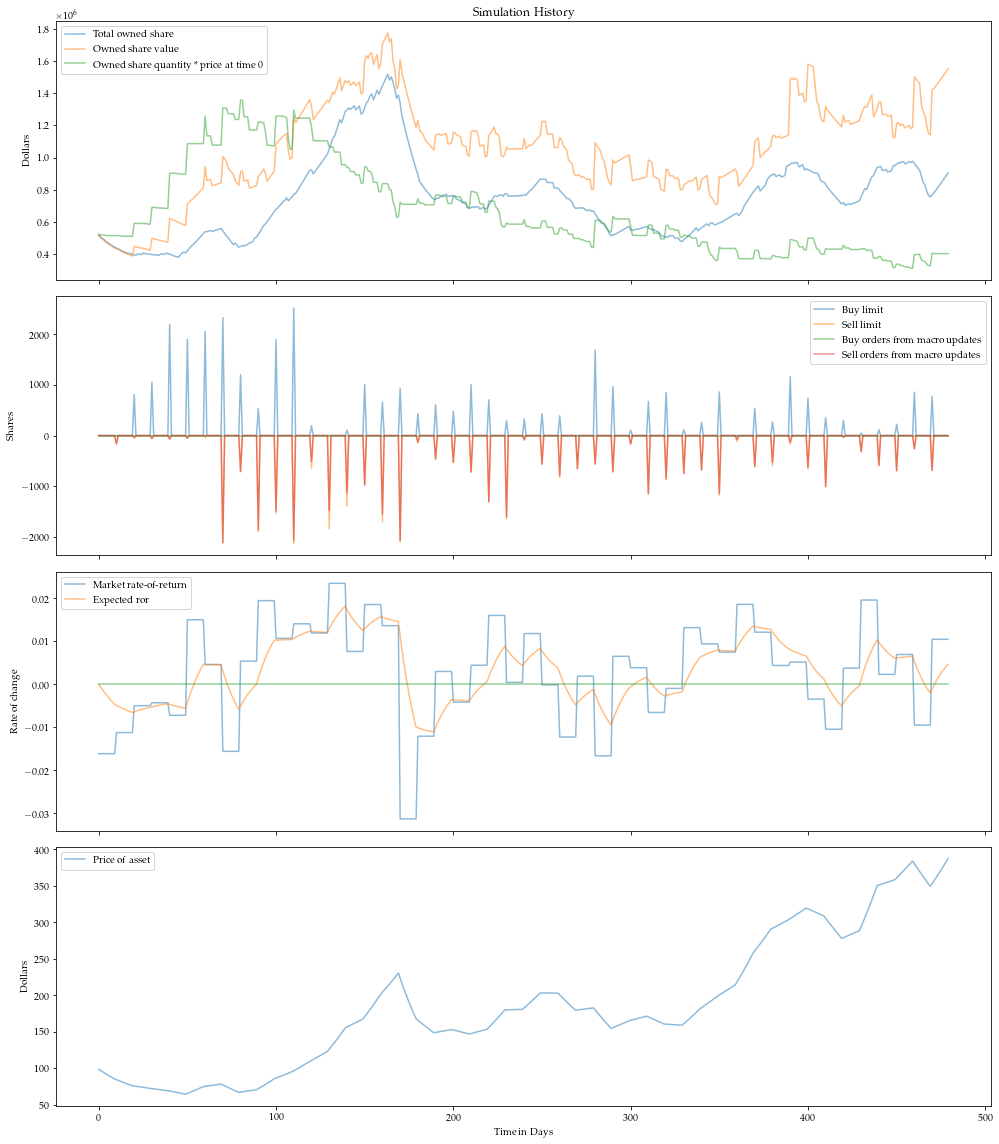

In [7]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})


fig, ax = plt.subplots(4,
    sharex='col',
    figsize=(14,16),
)

ax[0].plot(data['total_assets'], alpha=0.5, label='Total owned share')
ax[0].plot([p * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share value')
ax[0].plot([100 * o for (p,o) in zip(data['prices'], data['owned'])], alpha=0.5, label='Owned share quantity * price at time 0')
ax[0].legend()

ax[1].plot(data['buy'], alpha=0.5, label='Buy limit')
ax[1].plot(-data['sell'], alpha=0.5, label='Sell limit')
ax[1].plot(data['buy_macro'], alpha=0.5, label='Buy orders from macro updates')
ax[1].plot(-data['sell_macro'], alpha=0.5, label='Sell orders from macro updates')
ax[1].legend()

ax[2].plot(data['ror'], alpha=0.5, label='Market rate-of-return')
ax[2].plot(data['expected_ror'], alpha=0.5, label='Expected ror')
ax[2].plot(np.zeros(data['expected_ror'].shape), alpha=0.5)
ax[2].legend()

ax[3].plot(data['prices'], alpha=0.5, label='Price of asset')
ax[3].legend()

ax[0].set_title("Simulation History")
ax[0].set_ylabel("Dollars")
ax[1].set_ylabel("Shares")
ax[2].set_ylabel("Rate of change")
ax[3].set_ylabel("Dollars")
ax[3].set_xlabel("Time in Days")

plt.tight_layout()
plt.savefig("asset_bubble_run.png")
plt.show()

